**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2020

# NuScale 720 SMR BoP Simulation Final Report
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Students:** Jack and Nik <br>
**Course:** Engy-4390 Nuclear Systems Design and Analysis  <br>
**Mentor:** Prof. Valmor F. de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**11Dec2020**

In [1]:
import cortix

from cortix import Cortix
from cortix import Network
from reactor import SMPWR

import scipy.constants as unit

end_time = 1 * unit.hour 
unit.second = 1.0
time_step = 30.0 * unit.second
show_time = (True,5*unit.minute)

use_mpi = False  # True for MPI; False for Python multiprocessing

plant = Cortix(use_mpi=use_mpi, splash=True) # System top level

plant_net = plant.network = Network() # Network

[22142] 2020-11-15 02:43:10,436 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

In [2]:
'''Reactor'''

reactor = SMPWR()  # Create reactor module

reactor.name = 'SMPWR'
reactor.save = True
reactor.time_step = time_step
reactor.end_time = end_time
reactor.show_time = show_time

plant_net.module(reactor)  # Add reactor module to network

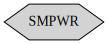

In [3]:
'''Balance of Plant Network Connectivity'''

#plant_net.connect([reactor, 'coolant-outflow'], [steamer, 'inflow'])

plant_net.draw()

In [4]:
'''Run'''

plant.run()  # Run network dynamics simulation

plant.close()  # Properly shutdow plant

[22142] 2020-11-15 02:43:10,528 - cortix - INFO - Launching Module <reactor.SMPWR object at 0x7f05373af990>
[22142] 2020-11-15 02:43:10,532 - cortix - INFO - SMPWR::run():time[m]=0.0
[22142] 2020-11-15 02:43:10,688 - cortix - INFO - SMPWR::run():time[m]=5.0
[22142] 2020-11-15 02:43:10,822 - cortix - INFO - SMPWR::run():time[m]=10.0
[22142] 2020-11-15 02:43:10,962 - cortix - INFO - SMPWR::run():time[m]=15.0
[22142] 2020-11-15 02:43:11,098 - cortix - INFO - SMPWR::run():time[m]=20.0
[22142] 2020-11-15 02:43:11,232 - cortix - INFO - SMPWR::run():time[m]=25.0
[22142] 2020-11-15 02:43:11,368 - cortix - INFO - SMPWR::run():time[m]=30.0
[22142] 2020-11-15 02:43:11,520 - cortix - INFO - SMPWR::run():time[m]=35.0
[22142] 2020-11-15 02:43:11,691 - cortix - INFO - SMPWR::run():time[m]=40.0
[22142] 2020-11-15 02:43:11,828 - cortix - INFO - SMPWR::run():time[m]=45.0
[22142] 2020-11-15 02:43:11,987 - cortix - INFO - SMPWR::run():time[m]=50.0
[22142] 2020-11-15 02:43:12,159 - cortix - INFO - SMPWR::r

In [5]:
reactor = plant_net.modules[0]

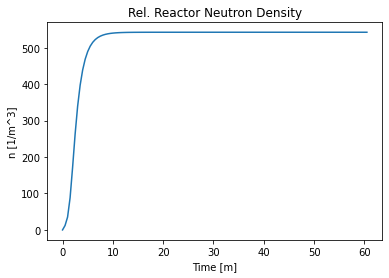

In [6]:
(quant, time_unit) = reactor.neutron_phase.get_quantity_history('neutron-dens')
quant.plot(x_scaling=1/unit.minute, x_label='Time [m]', y_label=quant.formal_name+' ['+quant.unit+']')

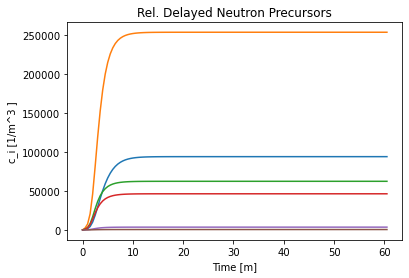

In [7]:
(quant, time_unit) = reactor.neutron_phase.get_quantity_history('delayed-neutrons-cc')
quant.plot(x_scaling=1/unit.minute, x_label='Time [m]', y_label=quant.formal_name+' ['+quant.unit+']')

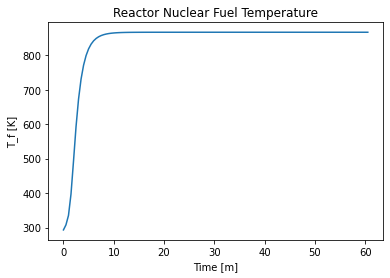

In [8]:
(quant, time_unit) = reactor.reactor_phase.get_quantity_history('fuel-temp')
quant.plot(x_scaling=1/unit.minute, x_label='Time [m]', y_label=quant.formal_name+' ['+quant.unit+']')

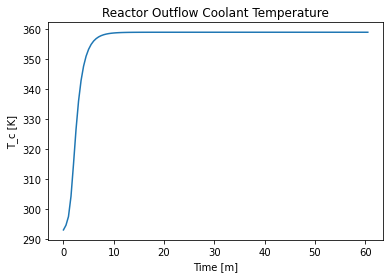

In [9]:
(quant, time_unit) = reactor.coolant_outflow_phase.get_quantity_history('temp')
quant.plot(x_scaling=1/unit.minute, x_label='Time [m]', y_label=quant.formal_name+' ['+quant.unit+']')

## [References](#toc)<a id="refs"></a>

1. Nuclear Reactor Engineering, [Engy-4350](https://github.com/dpploy/engy-4350) UMass Lowell, Dept. Chemical Engineering.